In [13]:
# Importamos librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [27]:
# Lectura del csv
df_air = pd.read_csv('Airlines.csv', sep=',')
df_air.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [32]:
# Lectura del csv
df_airport = pd.read_csv('Airports.csv', sep=';', on_bad_lines='skip')
df_airport.head()

,Airport,Cod_Airport,Desc_Airport,Loc
0,ATL - Hartsfield-Jackson Atlanta International...,ATL,Hartsfield-Jackson Atlanta International Airport,Georgia
1,AUS - Austin-Bergstrom International Airport -...,AUS,Austin-Bergstrom International Airport,Texas
2,BNA - Nashville International Airport - Tennessee,BNA,Nashville International Airport,Tennessee
3,BOS - Boston Logan International Airport - Mas...,BOS,Boston Logan International Airport,Massachusetts
4,BWI - Baltimore-Washington International Thurg...,BWI,Baltimore-Washington International Thurgood Ma...,Washington


In [33]:
df_airport.shape

(40, 4)

In [3]:
df_air.drop(df_air[df_air.Length == 0].index, inplace=True)
df_air.shape

(539379, 9)

In [4]:
df_air.loc[df_air['Time'] <= 500, 'TimeGroups'] = '<= 500'
df_air.loc[df_air['Time'].between(500, 801, inclusive='neither'), 'TimeGroups'] = '501 - 800'
df_air.loc[df_air['Time'].between(800, 1101, inclusive='neither'), 'TimeGroups'] = '801 - 1100'
df_air.loc[df_air['Time'] > 1100, 'TimeGroups'] = '> 1100'

df_air

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,TimeGroups
0,1,CO,269,SFO,IAH,3,15,205,1,<= 500
1,2,US,1558,PHX,CLT,3,15,222,1,<= 500
2,3,AA,2400,LAX,DFW,3,20,165,1,<= 500
3,4,AA,2466,SFO,DFW,3,20,195,1,<= 500
4,5,AS,108,ANC,SEA,3,30,202,0,<= 500
...,...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0,> 1100
539379,539380,FL,398,SEA,ATL,5,1439,305,0,> 1100
539380,539381,FL,609,SFO,MKE,5,1439,255,0,> 1100
539381,539382,UA,78,HNL,SFO,5,1439,313,1,> 1100


In [5]:
df_air.loc[df_air['Length'] <= 80, 'LengthGroups'] = '<= 80'
df_air.loc[df_air['Length'].between(80, 141, inclusive='neither'),  'LengthGroups'] = '81 - 140'
df_air.loc[df_air['Length'].between(140, 201, inclusive='neither'),  'LengthGroups'] = '141 - 200'
df_air.loc[df_air['Length'] > 200, 'LengthGroups'] = '> 200'
df_air

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,TimeGroups,LengthGroups
0,1,CO,269,SFO,IAH,3,15,205,1,<= 500,> 200
1,2,US,1558,PHX,CLT,3,15,222,1,<= 500,> 200
2,3,AA,2400,LAX,DFW,3,20,165,1,<= 500,141 - 200
3,4,AA,2466,SFO,DFW,3,20,195,1,<= 500,141 - 200
4,5,AS,108,ANC,SEA,3,30,202,0,<= 500,> 200
...,...,...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0,> 1100,> 200
539379,539380,FL,398,SEA,ATL,5,1439,305,0,> 1100,> 200
539380,539381,FL,609,SFO,MKE,5,1439,255,0,> 1100,> 200
539381,539382,UA,78,HNL,SFO,5,1439,313,1,> 1100,> 200


In [40]:
#Fusionamos Datasets
df = pd.merge(df_air, df_airport, how='left', left_on='AirportFrom', right_on='Cod_Airport')
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Airport,Cod_Airport,Desc_Airport,Loc
0,1,CO,269,SFO,IAH,3,15,205,1,SFO - San Francisco International Airport - Ca...,SFO,San Francisco International Airport,California
1,2,US,1558,PHX,CLT,3,15,222,1,PHX - Phoenix Sky Harbor International Airport...,PHX,Phoenix Sky Harbor International Airport,Arizona
2,3,AA,2400,LAX,DFW,3,20,165,1,LAX - Los Angeles International Airport - Cali...,LAX,Los Angeles International Airport,California
3,4,AA,2466,SFO,DFW,3,20,195,1,SFO - San Francisco International Airport - Ca...,SFO,San Francisco International Airport,California
4,5,AS,108,ANC,SEA,3,30,202,0,NaN,NaN,NaN,NaN


In [41]:
df.rename(columns={"Airport":"Airport_From", "Cod_Airport":"Cod_AirportFrom", "Desc_Airport":"Desc_AirportFrom", "Loc":"Loc_From"}, inplace=True)
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Airport_From,Cod_AirportFrom,Desc_AirportFrom,Loc_From
0,1,CO,269,SFO,IAH,3,15,205,1,SFO - San Francisco International Airport - Ca...,SFO,San Francisco International Airport,California
1,2,US,1558,PHX,CLT,3,15,222,1,PHX - Phoenix Sky Harbor International Airport...,PHX,Phoenix Sky Harbor International Airport,Arizona
2,3,AA,2400,LAX,DFW,3,20,165,1,LAX - Los Angeles International Airport - Cali...,LAX,Los Angeles International Airport,California
3,4,AA,2466,SFO,DFW,3,20,195,1,SFO - San Francisco International Airport - Ca...,SFO,San Francisco International Airport,California
4,5,AS,108,ANC,SEA,3,30,202,0,NaN,NaN,NaN,NaN


In [42]:
df = pd.merge(df, df_airport, how='left', left_on='AirportTo', right_on='Cod_Airport')
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Airport_From,Cod_AirportFrom,Desc_AirportFrom,Loc_From,Airport,Cod_Airport,Desc_Airport,Loc
0,1,CO,269,SFO,IAH,3,15,205,1,SFO - San Francisco International Airport - Ca...,SFO,San Francisco International Airport,California,IAH - George Bush Intercontinental Airport - H...,IAH,George Bush Intercontinental Airport,"Houston, Texas"
1,2,US,1558,PHX,CLT,3,15,222,1,PHX - Phoenix Sky Harbor International Airport...,PHX,Phoenix Sky Harbor International Airport,Arizona,CLT - Charlotte Douglas International Airport ...,CLT,Charlotte Douglas International Airport,North Carolina
2,3,AA,2400,LAX,DFW,3,20,165,1,LAX - Los Angeles International Airport - Cali...,LAX,Los Angeles International Airport,California,DFW - Dallas/Fort Worth International Airport ...,DFW,Dallas/Fort Worth International Airport,Texas
3,4,AA,2466,SFO,DFW,3,20,195,1,SFO - San Francisco International Airport - Ca...,SFO,San Francisco International Airport,California,DFW - Dallas/Fort Worth International Airport ...,DFW,Dallas/Fort Worth International Airport,Texas
4,5,AS,108,ANC,SEA,3,30,202,0,NaN,NaN,NaN,NaN,SEA - Seattle–Tacoma International Airport - W...,SEA,Seattle–Tacoma International Airport,Washington


In [43]:
df.rename(columns={"Airport":"Airport_To", "Cod_Airport":"Cod_AirportTo", "Desc_Airport":"Desc_AirportTo", "Loc":"Loc_To"}, inplace=True)
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Airport_From,Cod_AirportFrom,Desc_AirportFrom,Loc_From,Airport_To,Cod_AirportTo,Desc_AirportTo,Loc_To
0,1,CO,269,SFO,IAH,3,15,205,1,SFO - San Francisco International Airport - Ca...,SFO,San Francisco International Airport,California,IAH - George Bush Intercontinental Airport - H...,IAH,George Bush Intercontinental Airport,"Houston, Texas"
1,2,US,1558,PHX,CLT,3,15,222,1,PHX - Phoenix Sky Harbor International Airport...,PHX,Phoenix Sky Harbor International Airport,Arizona,CLT - Charlotte Douglas International Airport ...,CLT,Charlotte Douglas International Airport,North Carolina
2,3,AA,2400,LAX,DFW,3,20,165,1,LAX - Los Angeles International Airport - Cali...,LAX,Los Angeles International Airport,California,DFW - Dallas/Fort Worth International Airport ...,DFW,Dallas/Fort Worth International Airport,Texas
3,4,AA,2466,SFO,DFW,3,20,195,1,SFO - San Francisco International Airport - Ca...,SFO,San Francisco International Airport,California,DFW - Dallas/Fort Worth International Airport ...,DFW,Dallas/Fort Worth International Airport,Texas
4,5,AS,108,ANC,SEA,3,30,202,0,NaN,NaN,NaN,NaN,SEA - Seattle–Tacoma International Airport - W...,SEA,Seattle–Tacoma International Airport,Washington


In [47]:
df['Cod_AirportFrom'].fillna("Other", inplace=True)
df['Cod_AirportTo'].fillna("Other", inplace=True)
df['Loc_From'].fillna("Other", inplace=True)
df['Loc_To'].fillna("Other", inplace=True)

In [71]:
# Filtro dataframe con solo los vuelos que tuvieron delay
delays = df['Delay'] == 1
df_delay = df[delays]
df_delay.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Airport_From,Cod_AirportFrom,Desc_AirportFrom,Loc_From,Airport_To,Cod_AirportTo,Desc_AirportTo,Loc_To
0,1,CO,269,SFO,IAH,3,15,205,1,SFO - San Francisco International Airport - Ca...,SFO,San Francisco International Airport,California,IAH - George Bush Intercontinental Airport - H...,IAH,George Bush Intercontinental Airport,"Houston, Texas"
1,2,US,1558,PHX,CLT,3,15,222,1,PHX - Phoenix Sky Harbor International Airport...,PHX,Phoenix Sky Harbor International Airport,Arizona,CLT - Charlotte Douglas International Airport ...,CLT,Charlotte Douglas International Airport,North Carolina
2,3,AA,2400,LAX,DFW,3,20,165,1,LAX - Los Angeles International Airport - Cali...,LAX,Los Angeles International Airport,California,DFW - Dallas/Fort Worth International Airport ...,DFW,Dallas/Fort Worth International Airport,Texas
3,4,AA,2466,SFO,DFW,3,20,195,1,SFO - San Francisco International Airport - Ca...,SFO,San Francisco International Airport,California,DFW - Dallas/Fort Worth International Airport ...,DFW,Dallas/Fort Worth International Airport,Texas
5,6,CO,1094,LAX,IAH,3,30,181,1,LAX - Los Angeles International Airport - Cali...,LAX,Los Angeles International Airport,California,IAH - George Bush Intercontinental Airport - H...,IAH,George Bush Intercontinental Airport,"Houston, Texas"


In [49]:
# Agrupo "Delay" segun AirportFrom and AirportTo
f_airport = df_delay.groupby(by=['Cod_AirportFrom','Cod_AirportTo'])['id'].count()
f_airport

Cod_AirportFrom  Cod_AirportTo
ATL              AUS               75
                 BNA              124
                 BOS              189
                 BWI              185
                 CLT              219
                                 ... 
TPA              Other            626
                 PHL               87
                 PHX               43
                 RDU               81
                 STL               44
Name: id, Length: 1228, dtype: int64

In [8]:
type(f_airport)

pandas.core.series.Series

In [50]:
# Lo convierto en DataFrame
f_airport.to_frame()

id
Cod_AirportFrom Cod_AirportTo     
ATL             AUS             75
                BNA            124
                BOS            189
                BWI            185
                CLT            219
...                            ...
TPA             Other          626
                PHL             87
                PHX             43
                RDU             81
                STL             44

[1228 rows x 1 columns]

In [70]:
df_test = f_airport.unstack(level='Cod_AirportTo')
df_test.head()

Cod_AirportTo,ATL,AUS,BNA,BOS,BWI,CLT,DAL,DCA,DEN,DFW,...,PHX,RDU,SAN,SEA,SFO,SJC,SLC,SMF,STL,TPA
Cod_AirportFrom,,,,,,,,,,,,,,,,,,,,,
ATL,NaN,75.0,124.0,189.0,185.0,219.0,NaN,248.0,235.0,287.0,...,155.0,183.0,76.0,100.0,163.0,19.0,163.0,24.0,130.0,271.0
AUS,52.0,NaN,39.0,17.0,57.0,20.0,195.0,NaN,89.0,92.0,...,100.0,NaN,37.0,15.0,37.0,35.0,33.0,NaN,NaN,24.0
BNA,131.0,35.0,NaN,NaN,134.0,38.0,NaN,15.0,85.0,47.0,...,51.0,88.0,29.0,NaN,NaN,NaN,14.0,NaN,35.0,95.0
BOS,192.0,17.0,NaN,NaN,223.0,129.0,NaN,225.0,107.0,77.0,...,80.0,78.0,26.0,29.0,115.0,12.0,29.0,NaN,40.0,61.0
BWI,163.0,58.0,138.0,240.0,NaN,128.0,NaN,NaN,120.0,65.0,...,113.0,125.0,50.0,NaN,6.0,NaN,46.0,NaN,109.0,140.0


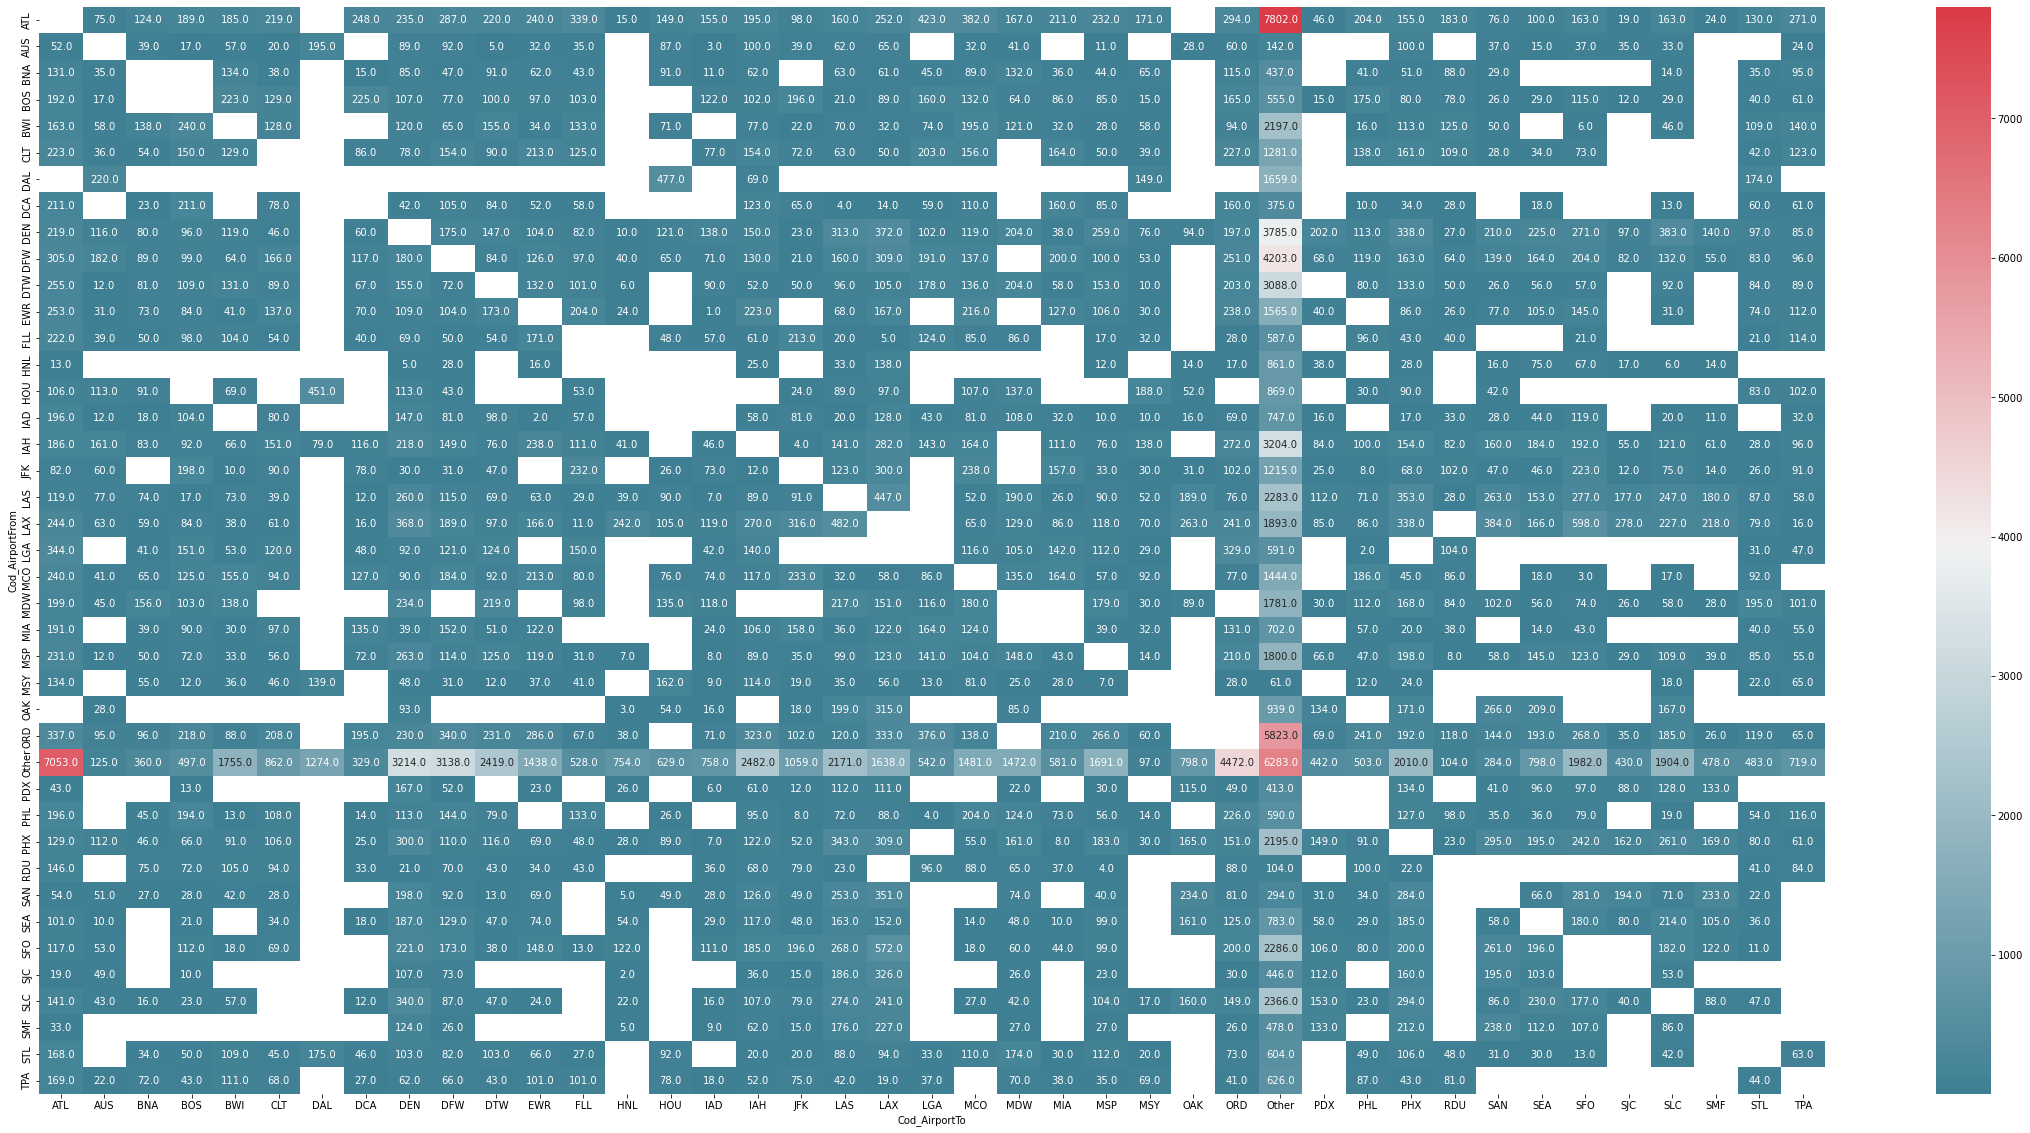

In [69]:
plt.figure(figsize = (40,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_test, annot=True, cmap = cmap, fmt=".1f")
plt.show()

In [72]:
# Agrupo "Delay" segun AirportFrom and AirportTo
f_loc = df_delay.groupby(by=['Loc_From','Loc_To'])['id'].count()
f_loc

Loc_From    Loc_To             
Arizona     Arlington, Virginia      25
            California             1342
            Chicago, Illinois       151
            Colorado                300
            Florida                 172
                                   ... 
Washington  Queens, New York        144
            Tennessee               138
            Texas                   262
            Utah                    260
            Virginia                 29
Name: id, Length: 646, dtype: int64

In [74]:
df_test2 = f_loc.unstack(level='Loc_To')
df_test2.head()

Loc_To,Arizona,"Arlington, Virginia",California,"Chicago, Illinois",Colorado,Florida,Georgia,"Honolulu, Hawaii","Houston, Texas",Illinois,...,North Carolina,Oregon,Other,Pennsylvania,"Queens, New York",Tennessee,Texas,Utah,Virginia,Washington
Loc_From,,,,,,,,,,,,,,,,,,,,,
Arizona,NaN,25.0,1342.0,151.0,300.0,172.0,129.0,28.0,211.0,161.0,...,129.0,149.0,2195.0,91.0,52.0,46.0,222.0,261.0,7.0,286.0
"Arlington, Virginia",34.0,NaN,14.0,160.0,42.0,389.0,211.0,NaN,123.0,NaN,...,106.0,NaN,375.0,10.0,124.0,23.0,105.0,13.0,NaN,18.0
California,1365.0,16.0,5663.0,578.0,1111.0,253.0,467.0,379.0,887.0,401.0,...,158.0,601.0,6336.0,200.0,609.0,86.0,797.0,786.0,283.0,950.0
"Chicago, Illinois",192.0,195.0,806.0,NaN,230.0,480.0,337.0,38.0,323.0,NaN,...,326.0,69.0,5823.0,241.0,478.0,96.0,435.0,185.0,71.0,281.0
Colorado,338.0,60.0,1184.0,197.0,NaN,324.0,219.0,10.0,271.0,204.0,...,73.0,202.0,3785.0,113.0,125.0,80.0,291.0,383.0,138.0,344.0


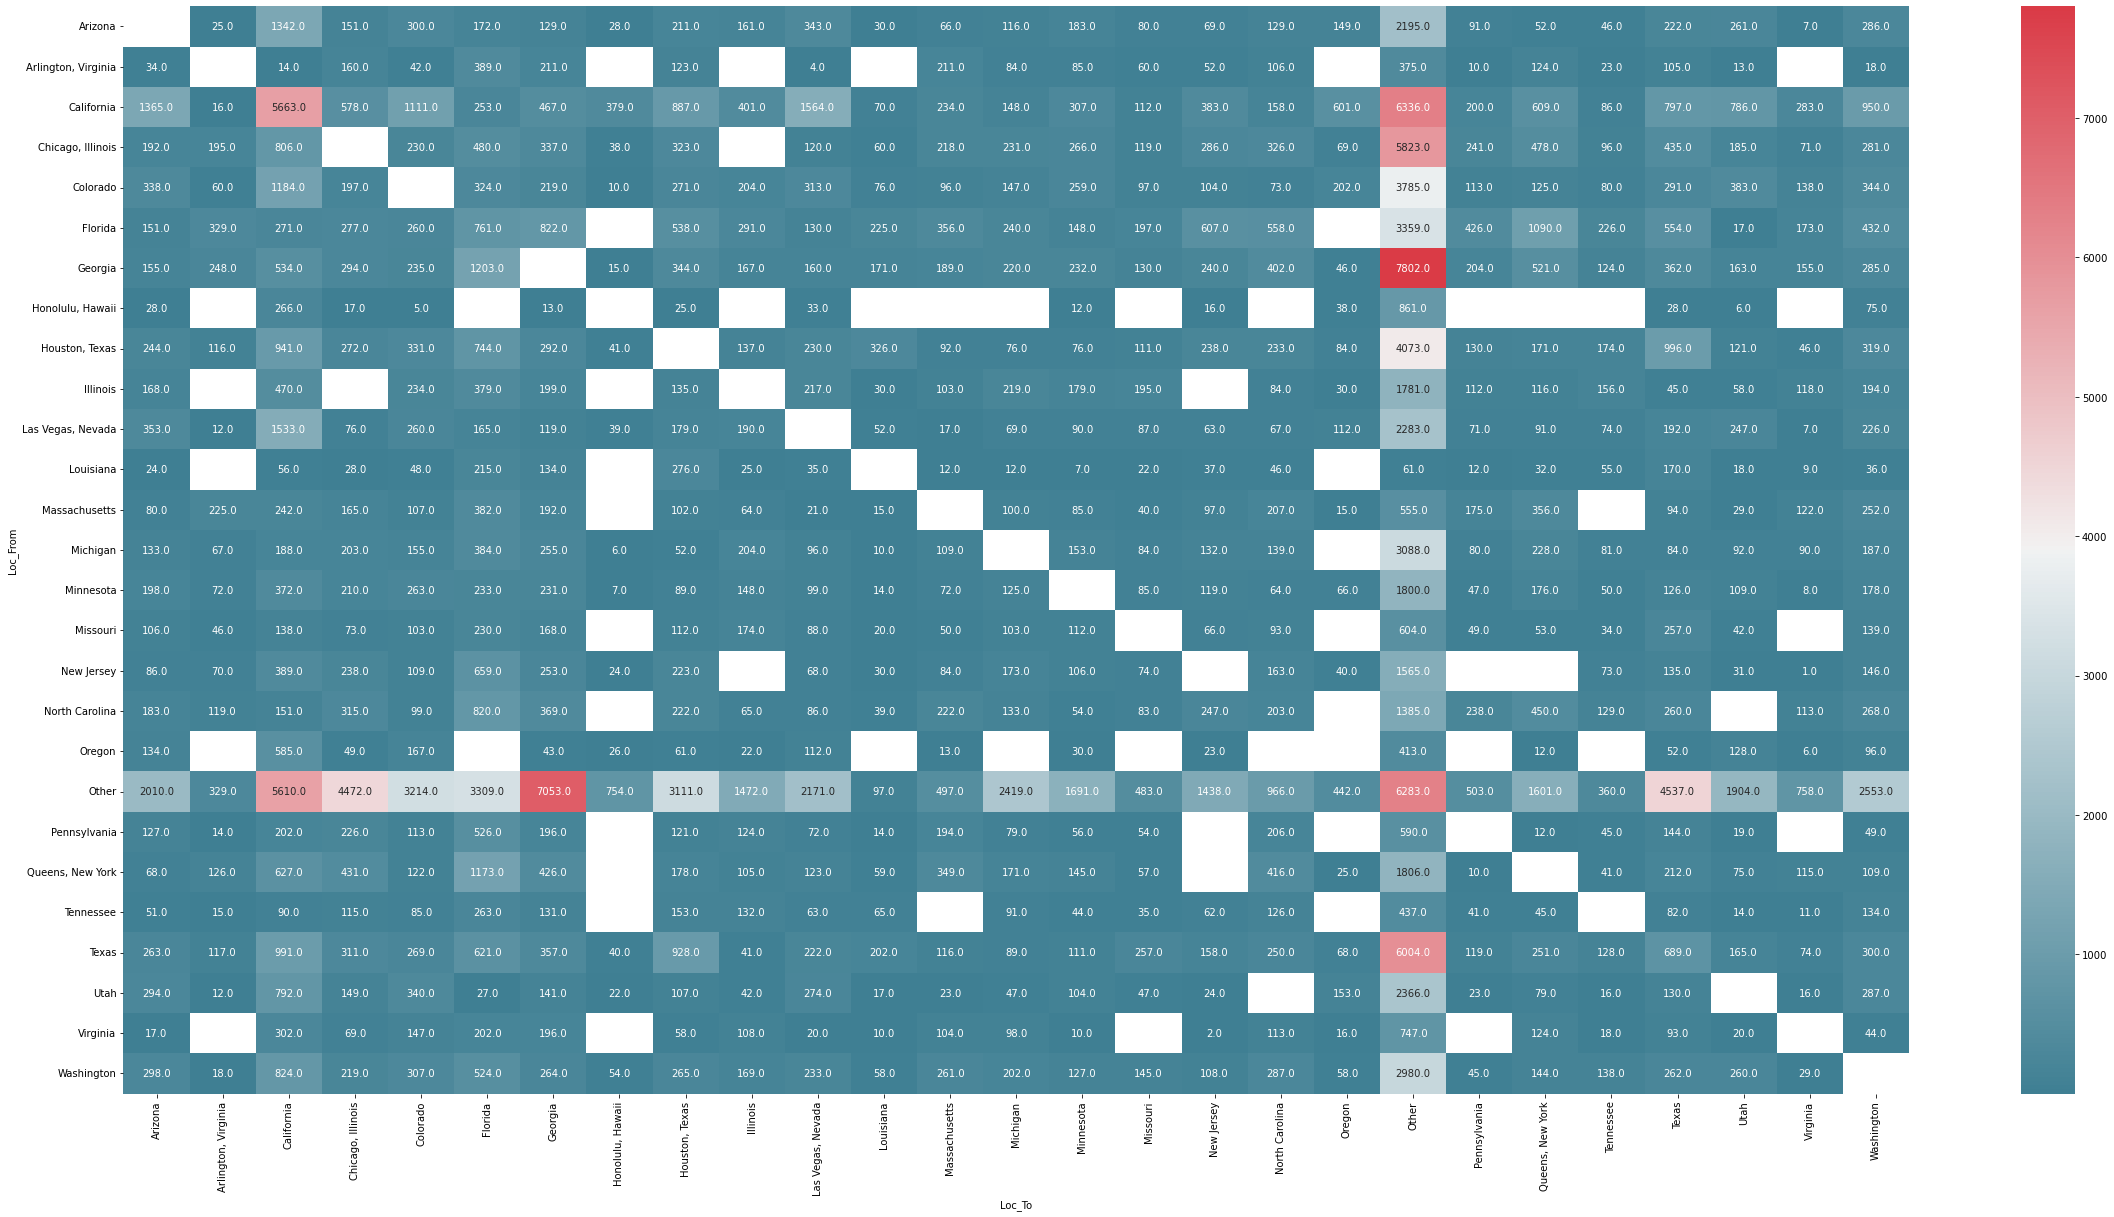

In [76]:
plt.figure(figsize = (40,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_test2, annot=True, cmap = cmap, fmt=".1f")
plt.show()